In [1]:
from astropy.io import fits

from visualization_helpers import *

import numpy as np

In [2]:
PROPOSAL_ID = '1386'
INSTRUMENT = 'NIRCAM'
directory = f'/data/scratch/bariskurtkaya/dataset/{INSTRUMENT}/{PROPOSAL_ID}/mastDownload/JWST/'

In [3]:
psfstacks_nircam = get_stage3_products(suffix='psfstack',directory=directory)

In [4]:
fits.open(psfstacks_nircam[0]).info()

Filename: /data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   ()      
  1  SCI           1 ImageHDU        97   (320, 320, 36)   float32   
  2  ERR           1 ImageHDU        11   (320, 320, 36)   float32   
  3  DQ            1 ImageHDU        12   (320, 320, 36)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [9230B]   


In [5]:
!ls /data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/ | grep psfstack

jw01386-a3001_t002_nircam_f250m-maskrnd-sub320a335r_psfstack.fits
jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits
jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r_psfstack.fits
jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r_psfstack.fits
jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r_psfstack.fits


In [6]:
fits.open(psfstacks_nircam[0])[0].header, fits.open(psfstacks_nircam[0])[1].header

(SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                    8 / array data type                                
 NAXIS   =                    0 / number of array dimensions                     
 EXTEND  =                    T                                                  
 DATE    = '2023-02-01T12:58:30.479' / UTC date file created                     
 ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
 TIMESYS = 'UTC     '           / principal time system for time-related keywords
 TIMEUNIT= 's       '           / Default unit applicable to all time values     
 FILENAME= 'jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits' / 
 SDP_VER = '2022_4a '           / Data processing software version number        
 PRD_VER = 'PRDOPSSOC-059'      / S&OC PRD version number used in data processing
 OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
 CAL_VER = '1.8.

In [7]:
header_psfstacks,sci_psfstacks,err_psfstacks,dq_psfstacks,_,_ = get_hdu(psfstacks_nircam,data='psf')

In [8]:
header_psfstacks[0]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-02-01T12:58:30.479' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits' / 
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-059'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.3.dev57+g3abb

In [9]:
header_psfstacks[0] == fits.open(psfstacks_nircam[0])[0].header, header_psfstacks[1] == fits.open(psfstacks_nircam[1])[0].header

(True, True)

In [10]:
f300m_prim = fits.open(psfstacks_nircam[0])[0].header
f300_sci = fits.open(psfstacks_nircam[0])[1].header

f300_important_header = {
 "FILTER": ['FILTER'], 
 "CORONMSK": f300m_prim['CORONMSK'], 
 "PROP_RA": f300m_prim['PROP_RA'], 
 "PROP_DEC": f300m_prim['PROP_DEC'], 
 "TARG_RA": f300m_prim['TARG_RA'], 
 "TARG_DEC": f300m_prim['TARG_DEC'], 
 "TARGURA" : f300m_prim['TARGURA'],
 "TARGUDEC": f300m_prim['TARGUDEC'],
 "XOFFSET": f300m_prim['XOFFSET'], 
 "YOFFSET": f300m_prim['YOFFSET'], 
 "GS_RA": f300m_prim['GS_RA'], 
 "GS_DEC": f300m_prim['GS_DEC'], 
 "GS_MAG": f300m_prim['GS_MAG'],
 "PHOTMJSR": f300_sci["PHOTMJSR"],
 "PHOTUJA2": f300_sci["PHOTUJA2"],
 "PIXAR_SR": f300_sci["PIXAR_SR"],
 "PIXAR_A2": f300_sci["PIXAR_A2"],
}

In [11]:
for idx, data in enumerate(sci_psfstacks):
    print(idx, data.shape)

0 (36, 320, 320)
1 (18, 320, 320)
2 (18, 320, 320)
3 (36, 320, 320)
4 (18, 320, 320)


In [12]:
psfaligns_nircam = get_stage3_products(suffix='psfalign',directory=directory)
header_psfaligns,sci_psfaligns,err_psfaligns,dq_psfaligns,_,_ = get_hdu(psfaligns_nircam,data='psf')

In [13]:
header_psfaligns[0]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-02-01T12:59:31.903' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01386002001_03107_00001_nrcalong_a3001_psfalign.fits' / Name of the
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-059'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.3.dev57+g3abb

In [14]:
for idx, data in enumerate(sci_psfaligns):
    print(idx, data.shape)

0 (4, 36, 320, 320)
1 (2, 18, 320, 320)
2 (4, 36, 320, 320)
3 (2, 18, 320, 320)
4 (2, 18, 320, 320)
5 (2, 18, 320, 320)
6 (4, 36, 320, 320)
7 (2, 18, 320, 320)
8 (2, 18, 320, 320)
9 (4, 36, 320, 320)


In [15]:
world_coords, axis_points = pixel2wcs(psfstacks_nircam[0],ispsf=True)

world_coords, axis_points

Set OBSGEO-B to   -35.242853 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706675646.072 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


((array([209.56250314, 209.56489694, 209.56729373, 209.56969354,
         209.57209634]),
  array([-42.10237181, -42.10154843, -42.10072793, -42.09991031,
         -42.09909558])),
 array([  0.,  80., 160., 240., 320.]))

# Exoplanet Extremes

In [57]:
exoplanet_extremes= {
    "Reference": "https://en.wikipedia.org/wiki/List_of_exoplanet_extremes",
    "Last Update Date": "29.05.2023 - 16.42",
    "Extremes from Earth's viewpoint":{
        "Most Distant": {
            "Planet": "SWEEPS-11 / SWEEPS-04",
            "Star": "SWEEPS J175902.67−291153.5 / SWEEPS J175853.92−291120.6",
            "Data": "27,710 light-years"
        },
        "Least Distant": {
            "Planet": "Proxima Centauri b, c and d",
            "Star": "Proxima Centauri",
            "Data": 4.25,
            "Measurment": 'lyr'
        },
        "Most Distant Directly Visible": {
            "Planet": "CT Chamaeleontis b",
            "Star": "CT Chamaeleontis",
            "Data": 622,
            "Measurment": 'lyr'
        },
        "Least Distant Directly Visible": {
            "Planet": "COCONUTS-2b",
            "Star": "COCONUTS-2",
            "Data": 35.5,
            "Measurment": 'lyr'
        },
        "Star with the brightest apparent magnitude with a planet": {
            "Planet": "Pollux b",
            "Star": "Pollux",
            "Data": "Apparent magnitude is 1.14"
        },
        "Star with the faintest apparent magnitude with a planet": {
            "Planet": "MOA-bin-29Lb",
            "Star": "MOA-bin-29L",
            "Data": "Apparent magnitude is 44.61"
        },
        "Largest angular distance separation from its host star": {
            "Planet": "COCONUTS-2b",
            "Star": "COCONUTS-2",
            "Data": 594,
            "Measurment": "arcsec"
        }
    },
    "Planetary characteristics": {
        "Largest radius": {
            "Planet": "TYC 8998-760-1 b",
            "Star": "TYC 8998-760-1",
            "Data": "3.0 Rj - Jupyter Radius"
        },
        "Smallest radius": {
            "Planet": "Kepler-37b",
            "Star": "Kepler-37",
            "Data": "0.296±0.037 Re - Earth Radius"
        }
    },
    "Orbital characteristics": {
        "Longest orbital period": {
            "Planet": "COCONUTS-2b",
            "Star": "COCONUTS-2",
            "Data": "1.1 million years"
        },
        "Shortest orbital period": {
            "Planet": "SWIFT J1756.9-2508 b",
            "Star": "SWIFT J1756.9-2508",
            "Data": "48 minutes, 56.5 seconds"
        },
        "Largest orbit around a single star": {
            "Planet": "COCONUTS-2b",
            "Star": "COCONUTS-2",
            "Data": "7,506 +5,205 -2,060 AU"
        },
        "Smallest orbit": {
            "Planet": "WD 1202-024 B",
            "Star": "WD 1202-024",
            "Data": "0.0021 AU"
        },
        "Smallest orbit around binary star": {
            "Planet": "Kepler-47b",
            "Star": "Kepler-47AB",
            "Data": "0.2877 +0.0014 -0.0011 AU"
        },
        "Largest orbit around binary star": {
            "Planet": "DT Virginis c",
            "Star": "DT Virginis",
            "Data": "1,168 AU"
        }
    },
    "System characteristics": {
        "System": "Kepler-90",
        "Planet(s)": 8,
        "Star(s)": 1,
    },
    "System with most stars": {
        "System": "Kepler-64",
        "Planet(s)": "PH1b (Kepler-64b)",
        "Star(s)": 4,
    }
}

exoplanet_extremes

{'Reference': 'https://en.wikipedia.org/wiki/List_of_exoplanet_extremes',
 'Last Update Date': '29.05.2023 - 16.42',
 "Extremes from Earth's viewpoint": {'Most Distant': {'Planet': 'SWEEPS-11 / SWEEPS-04',
   'Star': 'SWEEPS J175902.67−291153.5 / SWEEPS J175853.92−291120.6',
   'Data': '27,710 light-years'},
  'Least Distant': {'Planet': 'Proxima Centauri b, c and d',
   'Star': 'Proxima Centauri',
   'Data': 4.25,
   'Measurment': 'lyr'},
  'Most Distant Directly Visible': {'Planet': 'CT Chamaeleontis b',
   'Star': 'CT Chamaeleontis',
   'Data': 622,
   'Measurment': 'lyr'},
  'Least Distant Directly Visible': {'Planet': 'COCONUTS-2b',
   'Star': 'COCONUTS-2',
   'Data': 35.5,
   'Measurment': 'lyr'},
  'Star with the brightest apparent magnitude with a planet': {'Planet': 'Pollux b',
   'Star': 'Pollux',
   'Data': 'Apparent magnitude is 1.14'},
  'Star with the faintest apparent magnitude with a planet': {'Planet': 'MOA-bin-29Lb',
   'Star': 'MOA-bin-29L',
   'Data': 'Apparent magn

In [17]:
exoplanet_extremes.keys()

dict_keys(['Reference', 'Last Update Date', "Extremes from Earth's viewpoint", 'Planetary characteristics', 'Orbital characteristics', 'System characteristics', 'System with most stars'])

In [18]:
exoplanet_extremes["Extremes from Earth\'s viewpoint"].keys()

dict_keys(['Most Distant', 'Least Distant', 'Most Distant Directly Visible', 'Least Distant Directly Visible', 'Star with the brightest apparent magnitude with a planet', 'Star with the faintest apparent magnitude with a planet', 'Largest angular distance separation from its host star'])

In [19]:
exoplanet_extremes["Extremes from Earth\'s viewpoint"]["Most Distant"]

{'Planet': 'SWEEPS-11 / SWEEPS-04',
 'Star': 'SWEEPS J175902.67−291153.5 / SWEEPS J175853.92−291120.6',
 'Data': '27,710 light-years'}

In [20]:
{
    "ProposalType": [
        ["Proposalid", "PublicCount", "TotalCount"]
    ],
    "ERS": [
        [1386, 13, 13]
    ],
    "GTO": [
        [1412, 13, 47],
        [1184, 5, 91]
    ],
    "COM": [
        [1441, 18, 18],
        [1075, 245, 245]
    ],
    "CAL": [
        [1536, 188, 188],
        [1537, 188, 188],
        [1538, 188, 188],
        [1482, 146, 146],
        [4454, 2, 2]
    ]
}

{'ProposalType': [['Proposalid', 'PublicCount', 'TotalCount']],
 'ERS': [[1386, 13, 13]],
 'GTO': [[1412, 13, 47], [1184, 5, 91]],
 'COM': [[1441, 18, 18], [1075, 245, 245]],
 'CAL': [[1536, 188, 188],
  [1537, 188, 188],
  [1538, 188, 188],
  [1482, 146, 146],
  [4454, 2, 2]]}

# Effective PSF Generation

In [23]:
import os

if not os.environ.get('WEBBPSF_PATH'):
    os.environ['WEBBPSF_PATH'] = '/data/webbpsf-data'

import sys
import time

import numpy as np

import pandas as pd

import glob as glob

import urllib.request

import tarfile

from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.nddata import NDData
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.table import Table, QTable
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy import units as u

from photutils.background import MMMBackground, MADStdBackgroundRMS, Background2D
from photutils.detection import DAOStarFinder
from photutils import EPSFBuilder, GriddedPSFModel
from photutils.psf import DAOGroup, extract_stars, IterativelySubtractedPSFPhotometry

import jwst
from jwst.datamodels import ImageModel

import webbpsf
from webbpsf.utils import to_griddedpsfmodel

import pysynphot  # PYSIN_CDBS must be defined in the user's environment (see note below)

from collections import OrderedDict

/home/bariskurtkaya/miniconda3/envs/jwst/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /my/local/dir/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/home/bariskurtkaya/miniconda3/envs/jwst/lib/python3.10/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /my/local/dir/trds/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/home/bariskurtkaya/miniconda3/envs/jwst/lib/python3.10/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /my/local/dir/trds/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [18]:
%matplotlib inline
from matplotlib import style, pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.titlesize'] = plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20

font1 = {'family': 'helvetica', 'color': 'black', 'weight': 'normal', 'size': '12'}
font2 = {'family': 'helvetica', 'color': 'black', 'weight': 'normal', 'size': '20'}

In [19]:
filters = ['F070W', 'F090W', 'F115W', 'F140M', 'F150W2', 'F150W', 'F162M', 'F164N', 'F182M',
           'F187N', 'F200W', 'F210M', 'F212N', 'F250M', 'F277W', 'F300M', 'F322W2', 'F323N',
           'F335M', 'F356W', 'F360M', 'F405N', 'F410M', 'F430M', 'F444W', 'F460M', 'F466N', 'F470N', 'F480M']

psf_fwhm = [0.987, 1.103, 1.298, 1.553, 1.628, 1.770, 1.801, 1.494, 1.990, 2.060, 2.141, 2.304, 2.341, 1.340,
            1.444, 1.585, 1.547, 1.711, 1.760, 1.830, 1.901, 2.165, 2.179, 2.300, 2.302, 2.459, 2.507, 2.535, 2.574]

dict_utils = {filters[i]: {'psf fwhm': psf_fwhm[i]} for i in range(len(filters))}

In [105]:
dict_images = {'NRCA1': {}, 'NRCA2': {}, 'NRCA3': {}, 'NRCA4': {}, 'NRCA5': {},
               'NRCB1': {}, 'NRCB2': {}, 'NRCB3': {}, 'NRCB4': {}, 'NRCB5': {}}

dict_filter_short = {}
dict_filter_long = {}

ff_short = []
det_short = []
det_long = []
ff_long = []
detlist_short = []
detlist_long = []
filtlist_short = []
filtlist_long = []

images_dir = directory + 'jw01386001001_0310a_00002_nrcalong'
images = sorted(glob.glob(os.path.join(images_dir, "./*cal*fits")))
    
if not images:
    raise Exception(f'Images not collected {images}')


for image in images:

    im = fits.open(image)
    f = im[0].header['FILTER']
    d = im[0].header['DETECTOR']

    if d == 'NRCBLONG':
        d = 'NRCB5'
    elif d == 'NRCALONG':
        d = 'NRCA5'
    else:
        d = d

    wv = float(f[1:3])

    if wv > 24:         
        ff_long.append(f)
        det_long.append(d)

    else:
        ff_short.append(f)
        det_short.append(d)   

    detlist_short = sorted(list(dict.fromkeys(det_short)))
    detlist_long = sorted(list(dict.fromkeys(det_long)))

    unique_list_filters_short = []
    unique_list_filters_long = []

    for x in ff_short:

        if x not in unique_list_filters_short:

            dict_filter_short.setdefault(x, {})

    for x in ff_long:
        if x not in unique_list_filters_long:
            dict_filter_long.setdefault(x, {})   

    for d_s in detlist_short:
        dict_images[d_s] = dict_filter_short

    for d_l in detlist_long:
        dict_images[d_l] = dict_filter_long

    filtlist_short = sorted(list(dict.fromkeys(dict_filter_short)))
    filtlist_long = sorted(list(dict.fromkeys(dict_filter_long)))

    if len(dict_images[d][f]) == 0:
        dict_images[d][f] = {'images': [image]}
    else:
        dict_images[d][f]['images'].append(image)

print("Available Detectors for SW channel:", detlist_short)
print("Available Detectors for LW channel:", detlist_long)
print("Available SW Filters:", filtlist_short)
print("Available LW Filters:", filtlist_long)

Available Detectors for SW channel: []
Available Detectors for LW channel: ['NRCA5']
Available SW Filters: []
Available LW Filters: ['F410M']


In [106]:
det = 'NRCA5'
filt= 'F410M'

im = fits.open(dict_images[det][filt]['images'][0])

In [107]:
im[1].data.shape

(2, 320, 320)

findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.


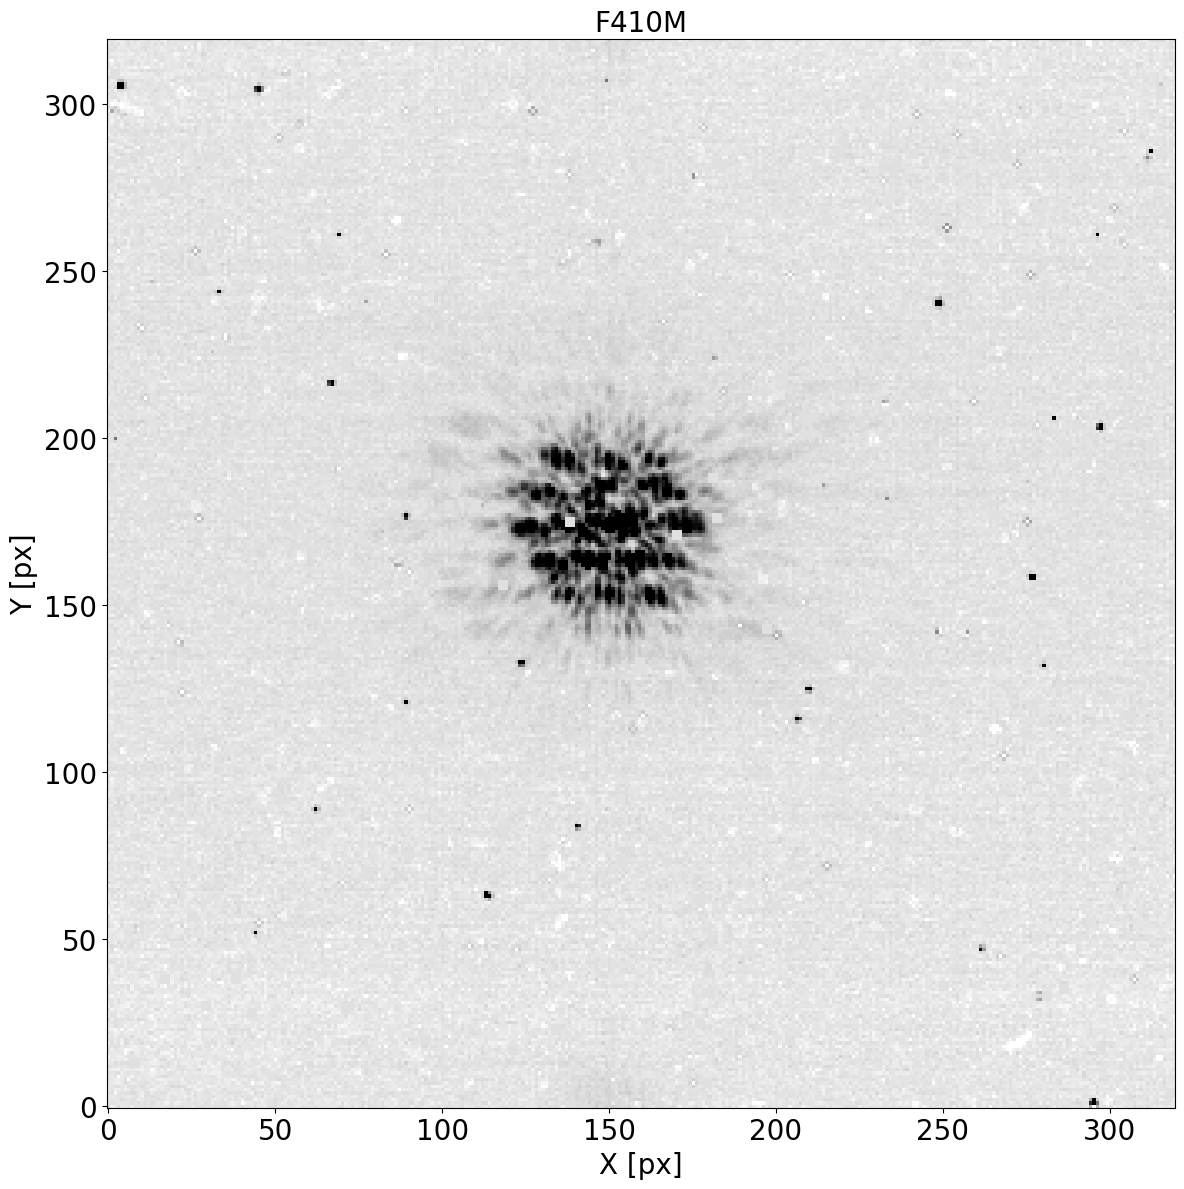

In [108]:
plt.figure(figsize=(12, 12))
   
data_sb = im[1].data[0]

ax = plt.subplot(1, 1, 1)

plt.xlabel("X [px]", fontdict=font2)
plt.ylabel("Y [px]", fontdict=font2)
plt.title(filt, fontdict=font2)
norm = simple_norm(data_sb, 'sqrt', percent=99.)

ax.imshow(data_sb, norm=norm, cmap='Greys')

plt.tight_layout()

In [109]:
imh = im[1].header
data = data_sb / imh['PHOTMJSR']
print('Conversion factor from {units} to DN/s for filter {f}:'.format(units=imh['BUNIT'], f=filt), imh['PHOTMJSR'])
area = im[4].data
data = data * area

Conversion factor from MJy/sr to DN/s for filter F410M: 5.246703624725342


In [110]:
def create_psf_model(det='NRCA1', filt='F070W', fov=101, source=None, create_grid=False, num=9, save_psf=False, 
                     detsampled=False):

    nrc = webbpsf.NIRCam()

    nrc.detector = det 
    nrc.filter = filt

    print("Using a {field}".format(field=fov), "px fov")

    if create_grid:
        print("")
        print("Creating a grid of PSF for filter {filt} and detector {det}".format(filt=filt, det=det))
        print("")
        num = num
        
        if save_psf:
            
            outname = 'PSF_%s_samp4_fov%d_npsfs%d.fits' % (filt, fov, num)
            psf = nrc.psf_grid(num_psfs=num, oversample=4, source=source, all_detectors=False, fov_pixels=fov, 
                               save=False, outfile=os.path.join(psfs_dir,outname), use_detsampled_psf=detsampled)

        else:
        
            psf = nrc.psf_grid(num_psfs=num, oversample=4, source=source, all_detectors=False, fov_pixels=fov, 
                               use_detsampled_psf=detsampled)
            
    else:
        print("")
        print("Creating a single PSF for filter {filt} and detector {det}".format(filt=filt, det=det))
        print("")
        num = 1
        
        if save_psf:

            outname = 'PSF_%s_samp4_fov%d_npsfs%d.fits' % (filt, fov, num)
            psf = nrc.psf_grid(num_psfs=num, oversample=4, source=source, all_detectors=False, fov_pixels=fov, 
                               save=False, outfile=os.path.join(psfs_dir,outname), use_detsampled_psf=detsampled)
        
        else:
      
            psf = nrc.psf_grid(num_psfs=num, oversample=4, source=source, all_detectors=False, fov_pixels=fov, 
                               use_detsampled_psf=detsampled)
        
    return psf     

In [111]:
psfs_dir = 'PSF_MODELS/'

if not os.path.exists(psfs_dir):
    os.makedirs(psfs_dir)

psf_webbpsf_single = create_psf_model(det=det, filt=filt, fov=11, source=None, create_grid=False, save_psf=False, 
                                      detsampled=False)

Using a 11 px fov

Creating a single PSF for filter F410M and detector NRCA5


Running instrument: NIRCam, filter: F410M
  Running detector: NRCA5
    Position 1/1: (1023, 1023) pixels
    Position 1/1 centroid: (21.437290490586626, 21.53269316956946)
  Saving file: PSF_MODELS/PSF_F410M_samp4_fov11_npsfs1_nrca5.fits


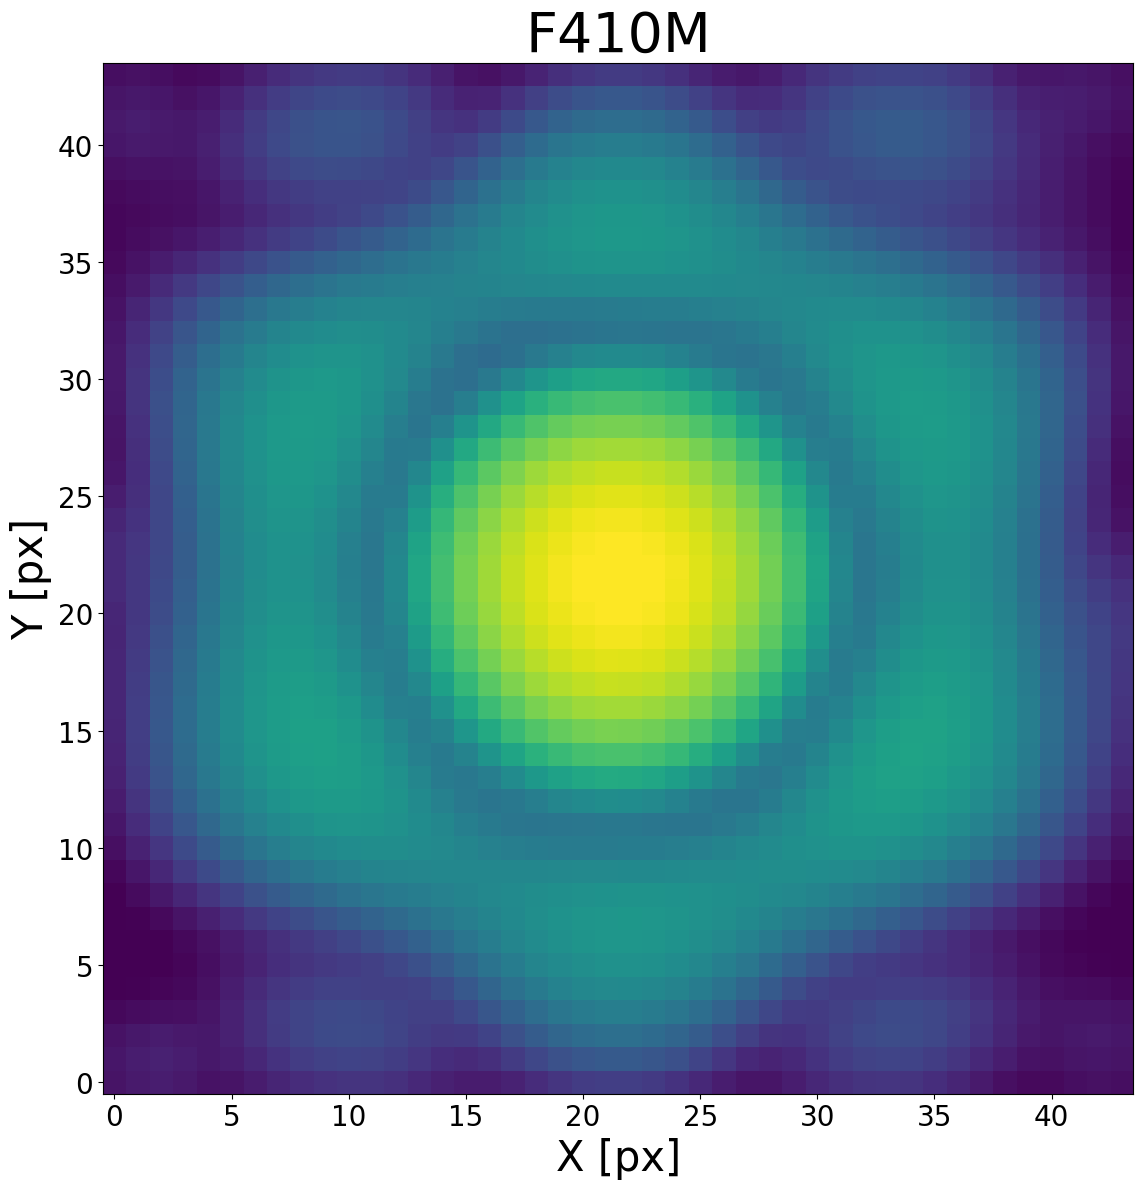

In [112]:
plt.figure(figsize=(12, 12))

ax = plt.subplot(1, 1, 1)

norm_psf = simple_norm(psf_webbpsf_single.data[0], 'log', percent=99.)
ax.set_title(filt, fontsize=40)
ax.imshow(psf_webbpsf_single.data[0], norm=norm_psf)
ax.set_xlabel('X [px]', fontsize=30)
ax.set_ylabel('Y [px]', fontsize=30)
plt.tight_layout()

In [113]:
psf_webbpsf_grid = create_psf_model(det=det, filt=filt, fov=11, source=None, create_grid=True, num=16, 
                                    save_psf=False, detsampled=False)

Using a 11 px fov

Creating a grid of PSF for filter F410M and detector NRCA5


Running instrument: NIRCam, filter: F410M
  Running detector: NRCA5
    Position 1/16: (0, 0) pixels
    Position 1/16 centroid: (21.420231697109024, 21.72292318074664)
    Position 2/16: (0, 682) pixels
    Position 2/16 centroid: (21.52276913061665, 21.627513445147653)
    Position 3/16: (0, 1365) pixels
    Position 3/16 centroid: (21.531654647756664, 21.551555893188226)
    Position 4/16: (0, 2047) pixels
    Position 4/16 centroid: (21.617517780801354, 21.556595326414453)
    Position 5/16: (682, 0) pixels
    Position 5/16 centroid: (21.44468948348228, 21.621099655477234)
    Position 6/16: (682, 682) pixels
    Position 6/16 centroid: (21.467153183088957, 21.63161918686804)
    Position 7/16: (682, 1365) pixels
    Position 7/16 centroid: (21.46126829967692, 21.58090116396157)
    Position 8/16: (682, 2047) pixels
    Position 8/16 centroid: (21.53354955888817, 21.5129379009093)
    Position 9/16: (1

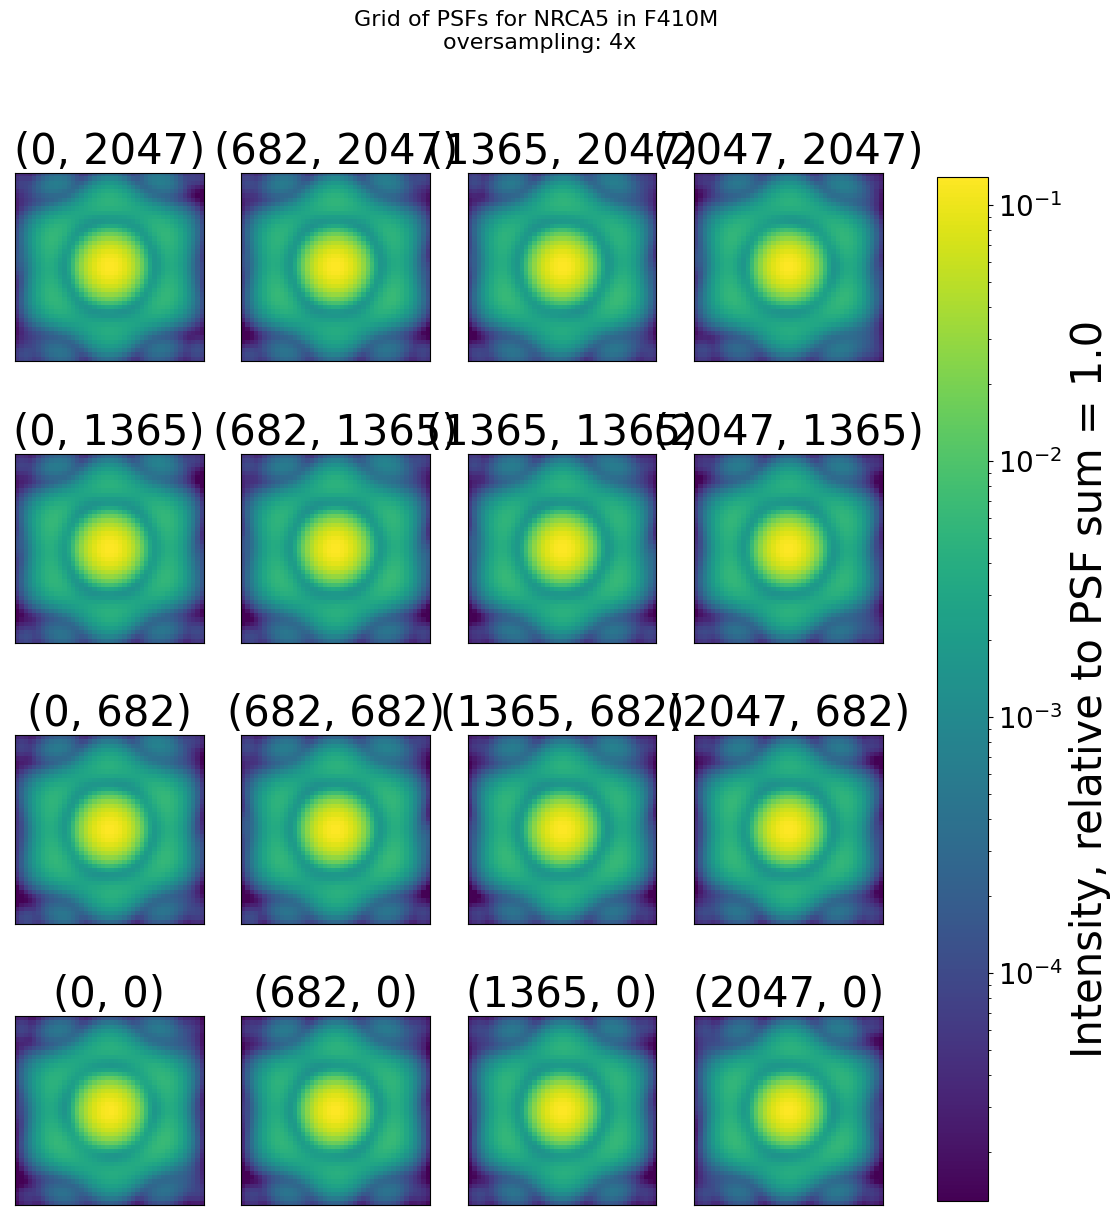

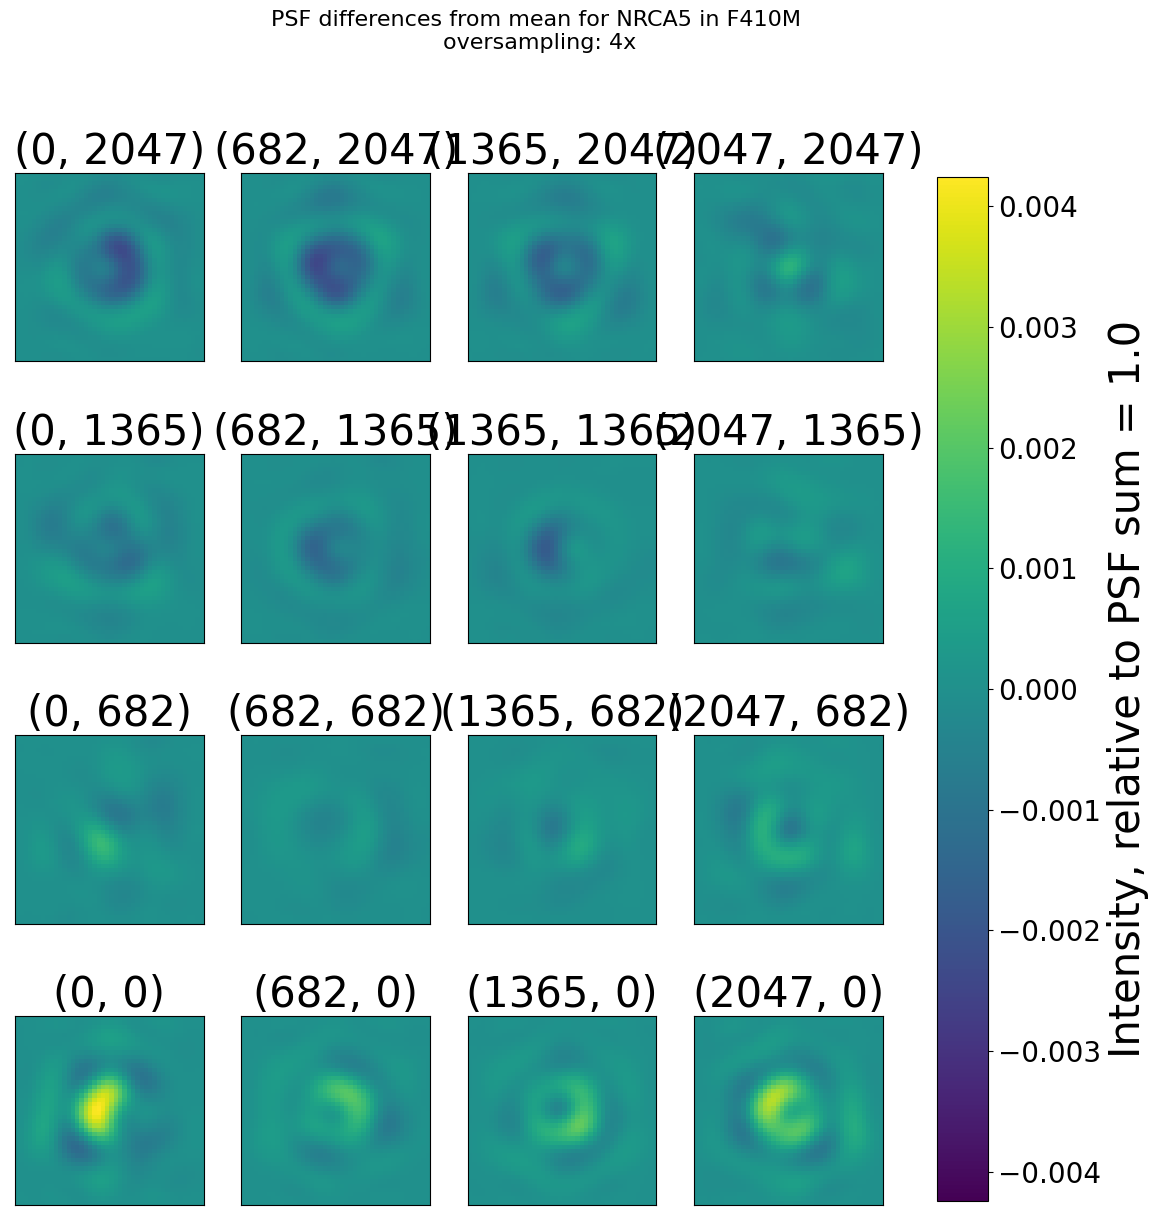

In [114]:
webbpsf.gridded_library.display_psf_grid(psf_webbpsf_grid, zoom_in=False, figsize=(14, 14))

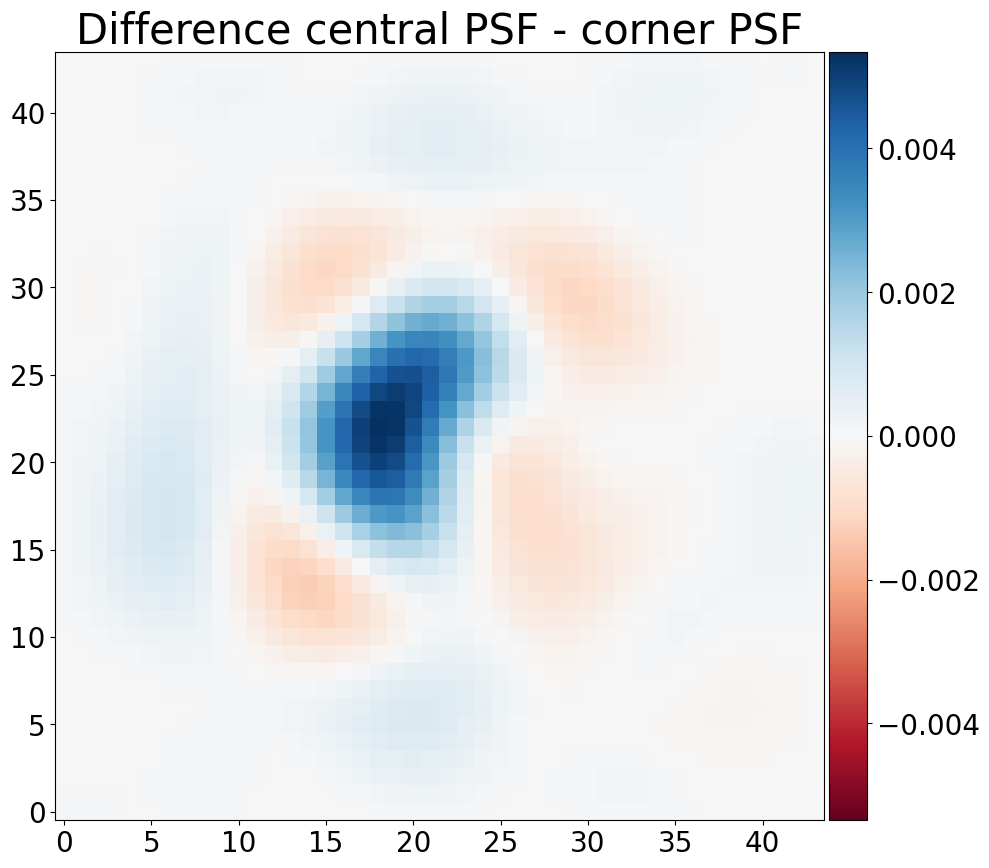

In [115]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.title('Difference central PSF - corner PSF')        
model1 = psf_webbpsf_single.data[0]
model2 = psf_webbpsf_grid.data[0]

ratio = (model1 - model2)
aa = np.max(np.abs(ratio))
divider = make_axes_locatable(ax)
im = ax.imshow(ratio, origin='lower', vmin=-aa, vmax=aa, cmap='RdBu')
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()

In [116]:
def calc_bkg(var_bkg=False):
    
    bkgrms = MADStdBackgroundRMS()
    mmm_bkg = MMMBackground()

    if var_bkg:
        print('Using 2D Background')
        sigma_clip = SigmaClip(sigma=3.)
        coverage_mask = (data == 0)

        bkg = Background2D(data, (100, 100), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=mmm_bkg,
                           coverage_mask=coverage_mask, fill_value=0.0)

        data_bkgsub = data.copy()
        data_bkgsub = data_bkgsub - bkg.background

        _, _, std = sigma_clipped_stats(data_bkgsub)

    else:

        std = bkgrms(data)
        bkg = mmm_bkg(data)

        data_bkgsub = data.copy()
        data_bkgsub -= bkg

    return data_bkgsub, std

In [117]:
def find_stars(det='NRCA1', filt='F070W', threshold=3, var_bkg=False):
    
    print('Finding stars --- Detector: {d}, Filter: {f}'.format(f=filt, d=det))
    
    sigma_psf = dict_utils[filt]['psf fwhm']

    print('FWHM for the filter {f}:'.format(f=filt), sigma_psf, "px")
    
    data_bkgsub, std = calc_bkg(var_bkg=False)
    
    daofind = DAOStarFinder(threshold=threshold * std, fwhm=sigma_psf)
    found_stars = daofind(data_bkgsub)
    
    print('')
    print('Number of sources found in the image:', len(found_stars))
    print('-------------------------------------')
    print('')
    
    return found_stars

In [118]:
tic = time.perf_counter()

found_stars = find_stars(det=det, filt=filt, threshold=10, var_bkg=False)

toc = time.perf_counter()

print("Elapsed Time for finding stars:", toc - tic)

Finding stars --- Detector: NRCA5, Filter: F410M
FWHM for the filter F410M: 2.179 px

Number of sources found in the image: 96
-------------------------------------

Elapsed Time for finding stars: 0.05598462652415037


findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.
findfont: Font family 'helvetica' not found.


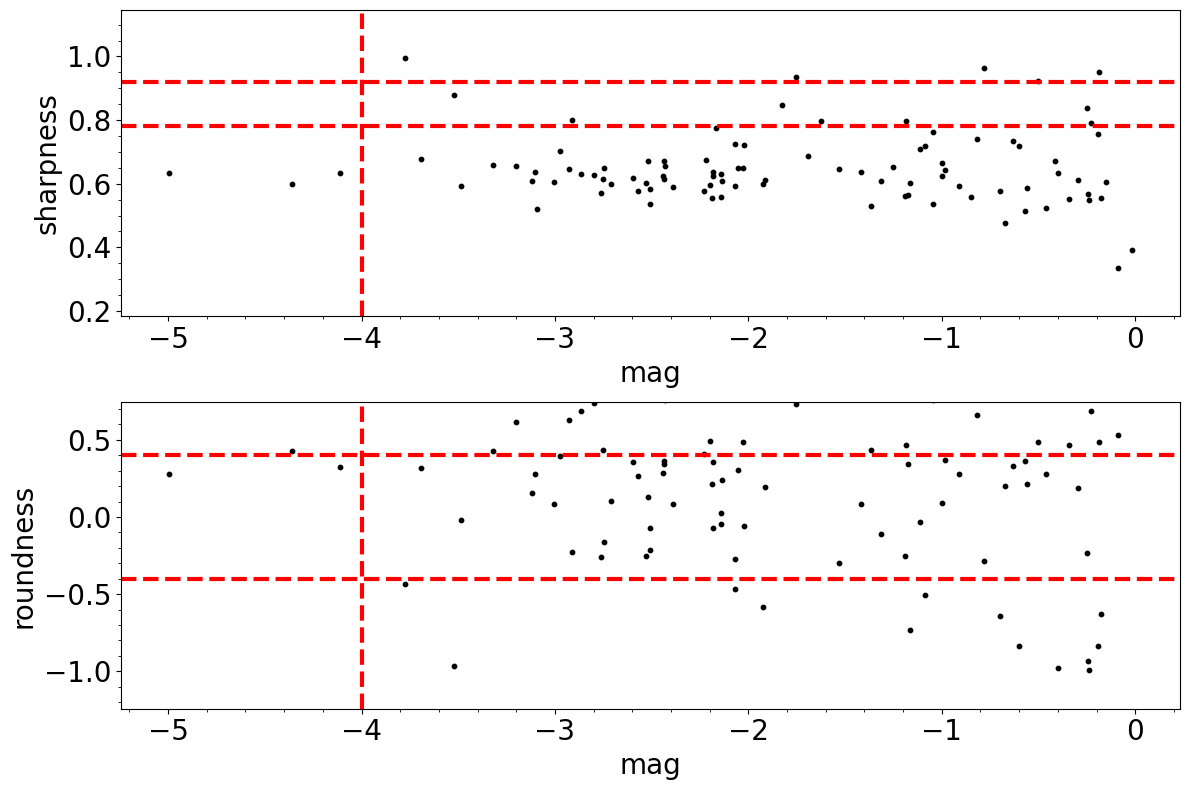

In [119]:
plt.figure(figsize=(12, 8))
plt.clf()

ax1 = plt.subplot(2, 1, 1)

ax1.set_xlabel('mag', fontdict=font2)
ax1.set_ylabel('sharpness', fontdict=font2)

xlim0 = np.min(found_stars['mag']) - 0.25
xlim1 = np.max(found_stars['mag']) + 0.25
ylim0 = np.min(found_stars['sharpness']) - 0.15
ylim1 = np.max(found_stars['sharpness']) + 0.15

ax1.set_xlim(xlim0, xlim1)
ax1.set_ylim(ylim0, ylim1)

ax1.xaxis.set_major_locator(ticker.AutoLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_major_locator(ticker.AutoLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax1.scatter(found_stars['mag'], found_stars['sharpness'], s=10, color='k')

sh_inf = 0.78
sh_sup = 0.92
mag_lim = -4.0

ax1.plot([xlim0, xlim1], [sh_sup, sh_sup], color='r', lw=3, ls='--')
ax1.plot([xlim0, xlim1], [sh_inf, sh_inf], color='r', lw=3, ls='--')
ax1.plot([mag_lim, mag_lim], [ylim0, ylim1], color='r', lw=3, ls='--')

ax2 = plt.subplot(2, 1, 2)

ax2.set_xlabel('mag', fontdict=font2)
ax2.set_ylabel('roundness', fontdict=font2)

ylim0 = np.min(found_stars['roundness2']) - 0.25
ylim1 = np.max(found_stars['roundness2']) - 0.25

ax2.set_xlim(xlim0, xlim1)
ax2.set_ylim(ylim0, ylim1)

ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_major_locator(ticker.AutoLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())

round_inf = -0.40
round_sup = 0.40

ax2.scatter(found_stars['mag'], found_stars['roundness2'], s=10, color='k')

ax2.plot([xlim0, xlim1], [round_sup, round_sup], color='r', lw=3, ls='--')
ax2.plot([xlim0, xlim1], [round_inf, round_inf], color='r', lw=3, ls='--')
ax2.plot([mag_lim, mag_lim], [ylim0, ylim1], color='r', lw=3, ls='--')

plt.tight_layout()

In [120]:
mask = ((found_stars['mag'] < mag_lim) & (found_stars['roundness2'] > round_inf)
        & (found_stars['roundness2'] < round_sup) & (found_stars['sharpness'] > sh_inf) 
        & (found_stars['sharpness'] < sh_sup))

found_stars_sel = found_stars[mask]
found_stars_sel_f115w = found_stars_sel

print('Number of stars selected to build ePSF:', len(found_stars_sel))

# if we include the separation criteria:

d = []

# we do not want any stars in a 10 px radius. 

min_sep = 10

x_tot = found_stars['xcentroid']
y_tot = found_stars['ycentroid']

for xx, yy in zip(found_stars_sel['xcentroid'], found_stars_sel['ycentroid']):

    sep = []
    dist = np.sqrt((x_tot - xx)**2 + (y_tot - yy)**2)
    sep = np.sort(dist)[1:2][0]
    d.append(sep)

found_stars_sel['min distance'] = d
mask_dist = (found_stars_sel['min distance'] > min_sep)

found_stars_sel2 = found_stars_sel[mask_dist]
found_stars_sel2_f115w = found_stars_sel2

print('Number of stars selected to build ePSF \
including "mimimum distance closest neighbour" selection):', len(found_stars_sel2))

Number of stars selected to build ePSF: 0
Number of stars selected to build ePSF including "mimimum distance closest neighbour" selection): 0


In [121]:
def build_epsf(det='NRCA1', filt='F070W', size=11, found_table=None, oversample=4, iters=10):
    
    hsize = (size - 1) / 2
    
    x = found_table['xcentroid']
    y = found_table['ycentroid']
    
    mask = ((x > hsize) & (x < (data.shape[1] - 1 - hsize)) & (y > hsize) & (y < (data.shape[0] - 1 - hsize)))

    stars_tbl = Table()
    stars_tbl['x'] = x[mask]
    stars_tbl['y'] = y[mask]
    
    data_bkgsub, _ = calc_bkg()
    
    nddata = NDData(data=data_bkgsub)
    stars = extract_stars(nddata, stars_tbl, size=size)

    print('Creating ePSF --- Detector {d}, filter {f}'.format(f=filt, d=det))

    epsf_builder = EPSFBuilder(oversampling=oversample, maxiters=iters, progress_bar=True)

    epsf, fitted_stars = epsf_builder(stars)
    
    return epsf

In [122]:
epsf = build_epsf(det=det, filt=filt, size=11, found_table=found_stars_sel, oversample=4, iters=3)

Creating ePSF --- Detector NRCA5, filter F410M


EPSFBuilder (3 maxiters):   0%|          | 0/3 [00:00<?, ?it/s]

EPSFBuilder converged after 0 iterations (of 3 maximum iterations)


AttributeError: 'NoneType' object has no attribute 'data'

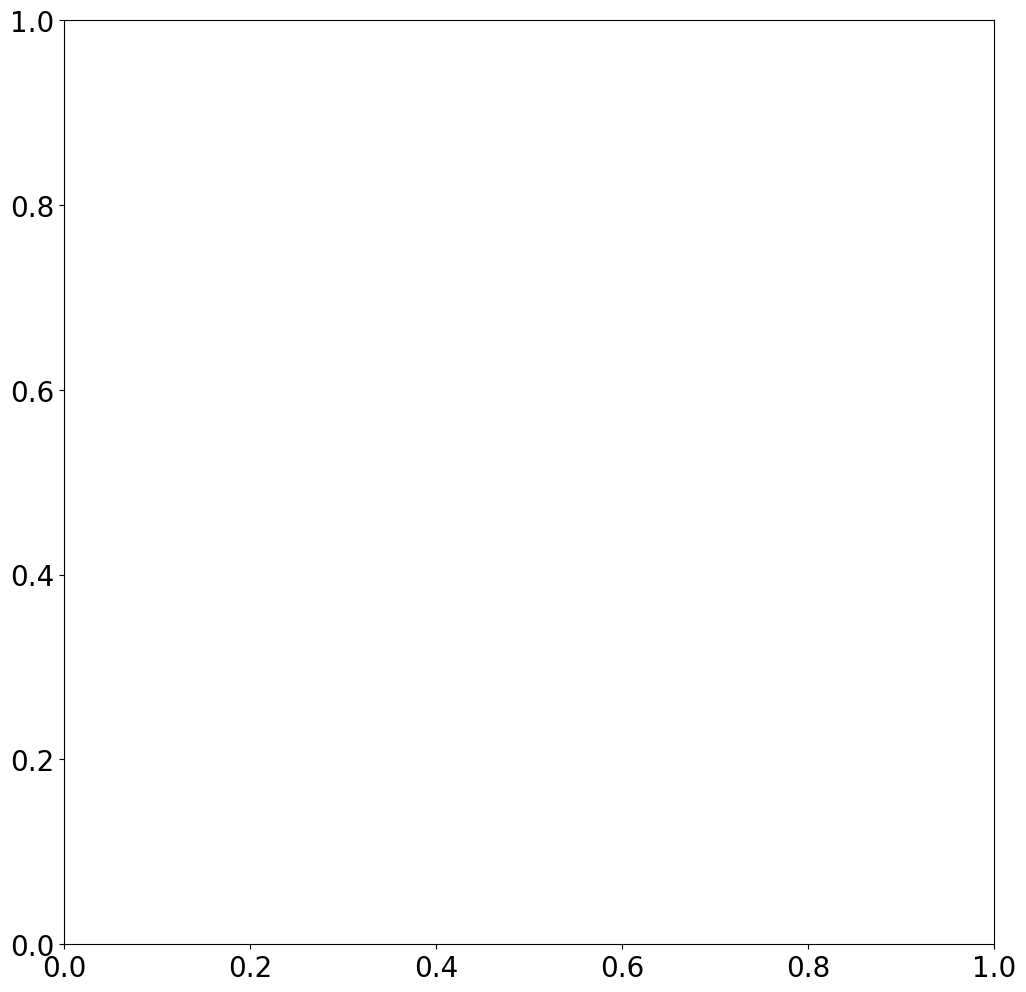

In [123]:
plt.figure(figsize=(12, 12))

ax = plt.subplot(1, 1, 1)

norm_epsf = simple_norm(epsf.data, 'log', percent=99.)
plt.title(filt, fontsize=30)
ax.imshow(epsf.data, norm=norm_epsf)
plt.tight_layout()

# Astropy Gaia

In [21]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

In [22]:
f300_important_header, type(f300_important_header['TARG_RA']), type(209.56764625)

({'FILTER': ['FILTER'],
  'CORONMSK': 'MASKA335R',
  'PROP_RA': 209.56764625,
  'PROP_DEC': -42.10084166666667,
  'TARG_RA': 209.56764625,
  'TARG_DEC': -42.10084166666667,
  'TARGURA': 0.1,
  'TARGUDEC': 0.1,
  'XOFFSET': 3.64834899080736e-11,
  'YOFFSET': -0.0200000000600685,
  'GS_RA': 209.4498772076249,
  'GS_DEC': -42.10998724317066,
  'GS_MAG': 16.17087554931641,
  'PHOTMJSR': 7.044739246368408,
  'PHOTUJA2': 165.5825842823231,
  'PIXAR_SR': 9.31e-14,
  'PIXAR_A2': 0.00396},
 float,
 float)

In [23]:
 GS_ORDER=                    2 #/ index of guide star within list of selected gui
 GSSTRTTM= '2022-07-29 22:53:03.4840000' #/ UTC time when guide star activity star
 GSENDTIM= '2022-07-29 22:57:15.3880000' #/ UTC time when guide star activity comp
 GDSTARID= 'S98T028046'         #/ guide star identifier                          
 GS_RA   =    209.4498772076249 #/ guide star right ascension                     
 GS_DEC  =   -42.10998724317066 #/ guide star declination                         
 GS_URA  = 9.45442092981998E-05 #/ guide star right ascension uncertainty         
 GS_UDEC = 8.18454934720979E-05 #/ guide star declination uncertainty             
 GS_MAG  =    16.17087554931641 #/ guide star magnitude in FGS detector           
 GS_UMAG =  0.08882072567939758 #/ guide star magnitude uncertainty               
 GS_V3_PA=    110.0327518780642 #/ V3 Position Angle of guide star for science    
 PCS_MODE= 'FINEGUIDE'          #/ Pointing Control System mode                   
 VISITEND= '2022-07-30 01:13:41.2360000' #/ Observatory UTC time when the visit co

In [25]:
ra, dec, u_ra, u_dec = f300_important_header['TARG_RA'], f300_important_header['TARG_DEC'], f300_important_header['TARGURA'], f300_important_header['TARGUDEC']

#ra, dec, u_ra, u_dec = f300m_prim['GS_RA'], f300m_prim['GS_DEC'], f300m_prim['GS_URA'], f300m_prim['GS_UDEC']

coord = SkyCoord(ra= ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

width = u.Quantity(u_ra, u.deg)

height = u.Quantity(u_dec, u.deg)

query_results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [26]:
query_results.pprint(max_lines=-1, max_width=3000)


         dist              solution_id             DESIGNATION               source_id      random_index ref_epoch         ra               ra_error               dec              dec_error             parallax          parallax_error    parallax_over_error         pmra             pmra_error            pmdec             pmdec_error      ra_dec_corr  ra_parallax_corr ra_pmra_corr ra_pmdec_corr dec_parallax_corr dec_pmra_corr dec_pmdec_corr parallax_pmra_corr parallax_pmdec_corr pmra_pmdec_corr astrometric_n_obs_al astrometric_n_obs_ac astrometric_n_good_obs_al astrometric_n_bad_obs_al astrometric_gof_al astrometric_chi2_al astrometric_excess_noise astrometric_excess_noise_sig astrometric_params_solved astrometric_primary_flag astrometric_weight_al astrometric_pseudo_colour astrometric_pseudo_colour_error mean_varpi_factor_al astrometric_matched_observations visibility_periods_used astrometric_sigma5d_max frame_rotator_object_type matched_observations duplicated_source phot_g_n_obs  pho

In [58]:
ra_dec_errors = np.abs(query_results['ra'] + query_results['dec'] - ra - dec)

min_err_idx = np.argmin(ra_dec_errors)

In [59]:
ra_dec_errors[min_err_idx], min_err_idx

(9.010256803776429e-06, 0)

In [56]:
distance = (query_results[min_err_idx]['parallax'] * u.marcsec).to(u.parsec, equivalencies=u.parallax())

distance, distance.to(u.lightyear)

(<Quantity 117.49259059 pc>, <Quantity 383.20957756 lyr>)

In [ ]:
- uzakligi hesapladik
- pixel to arcsec bulduk
- dagilimi belirledik
- interpolation yaptik
- parkakligi ayarladik
- effective psf denenebilir
- slot transformer object-centric learning
- query duzeltilecek
- makale yenilenecek
- supervised / self-supervised / unsupervised